# Project: Investigate TMDB dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I choose the TMDb movie data set to complete this project. This data set contains information about 10,000 movies and 21 features to descibe them such as 'revenue', 'cast'.


**Questions to be answered through the investigation**

1- What are the Top 10 Movies by Rating and lowest as well?

2- What characteristics are associated with movies that have high revenues?

3- Which genres are most popular from year to year?

4- What is the most liked runtime of the movies according to their rating?

5- Which movies have largest and lowest budgets? what is thier revenue?

6- What Are The 10 Best Movie Production Companies?(by number of produced movies

7- What Are The 10 Top Movie Production Companies?(by net profit)

8- Which decade has the most number of releases?

In [2]:
#import needed packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

After Observing 'tmdb_movies.csv' file and proposed questions for the analysis we will drop unneeded columns that are irrelevant to the analysis so data will be more useful.

### General Properties

In [3]:
# Loading data Using Pandas read_csv function
data = pd.read_csv('tmdb-movies.csv')

#print the first 5 rows of the dataset
data.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# print the concise summery of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Observation From The Dataset


- The columns 'revenue', 'budget','budget_adj','revenue_adj' have a value of zero for more than half of the rows

- Features with missing values:
    - imdb_id
    - cast
    - homepage
    - director
    - tagline
    - keywords
    - overview
    - genres
    - production_companies

- The columns 'budget_adj', 'revenue_adj', 'release_date', 'homepage', 'tagline', 'keywords', 'overview', 'imdb_id', 'keywords' aren't valuable for the analysis.
    
## Data Cleaning 

- We need to remove the unnecessary columns such as 'homepage', 'tagline',.. etc

- we need to remove the dublicates

- We need to fill the null values in a proper way

- we need to deal the zero values in columns 'revenue', 'budget','budget_adj','revenue_adj' 

- We need to deal with incorrect data in columns 'revenue', 'budget'

### 1- remove unnecessary columns


In [6]:
data.drop(['budget_adj', 'revenue_adj','release_date', 'keywords', 'overview','imdb_id','homepage','tagline'],axis =1,inplace = True)

print("Afetr Removing unnecessary columns (Rows,Columns) : ",data.shape)

Afetr Removing unnecessary columns (Rows,Columns) :  (10866, 13)


### 2- Remove Duplicate Rows

In [7]:
#for counting the duplicate elements we sum all the rows
sum(data.duplicated())

1

In [8]:
# Now drop that single row
data.drop_duplicates(inplace = True)

print("Afetr Removing the duplicates (Rows,Columns) : ",data.shape)

Afetr Removing the duplicates (Rows,Columns) :  (10865, 13)


### 3- Handling null values

In [9]:
data.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

#### Since the number of rows with null values is not that big (less than 10%), we can simply drop them

In [10]:
data.dropna(how = 'any',inplace = True)
print("Afetr dropping null values (Rows,Columns) : ",data.shape)

Afetr dropping null values (Rows,Columns) :  (9772, 13)


### 4- handling Zero values 

In [11]:
# we will replace zero values with the mean value of each column(we will execlude zero values when calculation the mean)
columns_with_zeros = ['budget', 'revenue', 'runtime']
for column in columns_with_zeros :
    non_zero = data[column]!= 0
    mean = data[column][non_zero].mean()
    data[column].replace(0, data[column].mean(), inplace=True)
    
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000
mean,63189.640810,0.694721,2.404598e+07,6.696239e+07,103.063554,239.312014,5.963528,2000.878428
std,90718.059987,1.036931,2.912660e+07,1.162142e+08,27.623136,603.011504,0.913174,13.036794
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10221.500000,0.232710,1.617967e+07,3.526309e+07,91.000000,18.000000,5.400000,1994.000000
50%,18677.500000,0.419762,1.617967e+07,4.423121e+07,100.000000,46.000000,6.000000,2005.000000
75%,70577.250000,0.776408,1.928750e+07,4.423121e+07,112.000000,173.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


### 5- handling incorrect data

In [12]:
# columns like 'revenue' and 'budget' have some incorrect data like 1 and 2 ,
#so will drop any row with revenue or budget less 10000
data.drop(data[data.revenue < 10000].index, inplace=True)
data.drop(data[data.budget < 10000].index, inplace=True)


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What are the Top 10 Movies by Rating and lowest as well?)

In [13]:
#Get the top 10 movies
top_10 = data.nlargest(10,'vote_average')
top_10.head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
6911,24970,0.212010,1.617967e+07,4.423121e+07,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,145.0,Music,SMV Enterprises|Columbia Music Video|EMI,23,8.7,2006
3690,68450,0.321341,1.617967e+07,4.423121e+07,The Art of Flight,Travis Rice|Nicolas Muller|Mark Landvik|Jake B...,Curt Morgan,80.0,Adventure|Documentary,Red Bull Media House|Brain Farm Digital Cinema,60,8.5,2011
8221,55676,0.194889,1.617967e+07,4.423121e+07,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Brian De Palma|Gregory Peck|Fr...,Martin Scorsese|Michael Henry Wilson,225.0,Documentary,Miramax Films|British Film Institute (BFI),11,8.5,1995
8411,25093,0.302908,1.617967e+07,4.423121e+07,Queen - Rock Montreal,Freddie Mercury|Roger Taylor|John Deacon|Brian...,Saul Swimmer,138.0,Music,Edel records GmbH,14,8.5,1981
609,321640,0.033378,1.617967e+07,4.423121e+07,The Jinx: The Life and Deaths of Robert Durst,Robert Durst|Andrew Jarecki|Marc Smerling|Zach...,Andrew Jarecki,240.0,Documentary,Blumhouse Productions|Hit the Ground Running F...,72,8.4,2015


In [14]:
#Get the lowest 10 movies
lowest_10 = data.nsmallest(10, 'vote_average')
lowest_10.head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
7772,25055,0.121120,1.617967e+07,4.423121e+07,Transmorphers,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...,Leigh Scott,86.0,Action|Adventure|Science Fiction,"Asylum, The",10,1.5,2007
10865,22293,0.035919,1.900000e+04,4.423121e+07,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74.0,Horror,Norm-Iris,15,1.5,1966
4882,120846,0.079281,1.617967e+07,4.423121e+07,Jurassic Shark,Emanuelle Carriere|Christine Emes|Celine Filio...,Brett Kelly,75.0,Action|Horror|Science Fiction,Dudez Productions,13,2.0,2012
3822,83896,0.159707,1.617967e+07,4.423121e+07,Sand Sharks,Corin Nemec|Brooke Hogan|Vanessa Evigan|Eric S...,Mark Atkins,87.0,Comedy|Horror|Science Fiction,Rogue State|Remember Dreaming Productions|Litt...,17,2.1,2011
7220,31117,0.157959,1.617967e+07,9.109322e+06,Superbabies: Baby Geniuses 2,Jon Voight|Scott Baio|Vanessa Angel|Skyler Sha...,Bob Clark,88.0,Family|Comedy,Crystal Sky Worldwide|Triumph Films,11,2.1,2004


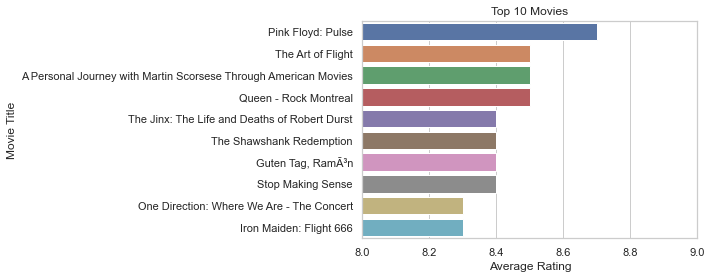

In [15]:
#plot the top 10 movies names
sns.set(style="whitegrid");
f, ax = plt.subplots();
ax = sns.barplot(x='vote_average', y='original_title', data=top_10);
ax.set(xlim=(8,9), ylabel="Movie Title", xlabel="Average Rating");# the xlim is set to these values as the top rated movie is 8.7
plt.title('Top 10 Movies');

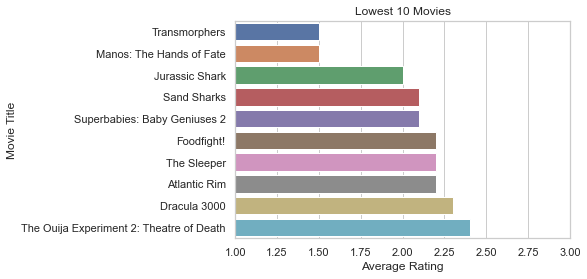

In [16]:
#plot the lowest 10 movies names
sns.set(style="whitegrid");
f, ax = plt.subplots();
ax = sns.barplot(x='vote_average', y='original_title', data=lowest_10);
ax.set(xlim=(1,3), ylabel="Movie Title", xlabel="Average Rating");
plt.title('Lowest 10 Movies');

### Research Question 2  (What characteristics are associated with movies that have high revenues?)

#### We will find how the revenue feature is correlated with some other features like 'popularity','vote_average','vote_count','budget','revenue','runtime'

In [17]:
# we need to create a datafreame with these features only
correlated_with_revenue = data.loc[:,['popularity','vote_average','vote_count','budget','revenue','runtime']]

corr = correlated_with_revenue.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,popularity,vote_average,vote_count,budget,revenue,runtime
popularity,1.000,0.239,0.803,0.507,0.633,0.156
vote_average,0.239,1.000,0.280,0.079,0.164,0.191
vote_count,0.803,0.280,1.000,0.608,0.769,0.185
budget,0.507,0.079,0.608,1.000,0.700,0.192
revenue,0.633,0.164,0.769,0.700,1.000,0.159
runtime,0.156,0.191,0.185,0.192,0.159,1.000


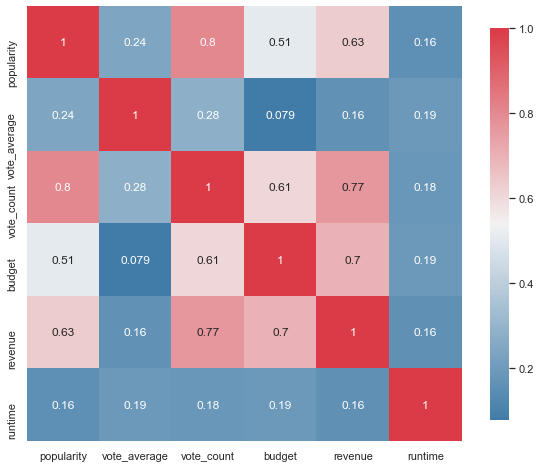

In [18]:
corr = correlated_with_revenue.corr()
fig, plots = plt.subplots( figsize =( 10 , 8 ) )
cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
fig = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=plots, annot = True, annot_kws = { 'fontsize' : 12 })

#### A brief comments on the above plot

- Budget vs Revenue

  The correlation between budget and revenue is pretty strong, So There is a good chance that movies with higher budget result in better revenues.
  - Correlation = 0.7
  

- Vote average vs Revenue

  The correlation between vote average and revenue is weak , So we can't actually tell how the revenue would be like by looking at the vote average.
  - Correlation = 0.16
  
  
- vote count vs Revenue

  There is a strong correlation between vote_count and revenue, The higher the vote count is the more revenue this movie is expected to get.
  - correlation = 0.77
  
  
- popularity vs Revenue

  The revenue increases as populartiy increases, So we can expect movies with high popularity to have a good revenue.
  - Correlation = 0.63
  
  
- runtime vs Revenue

  The lengh of the movie doesn't seem to have a great impact on its revenue.
  - Correlation = 0.16

### Research Question 3  (Which genres are most popular from year to year?)

#### First we need to seperate the genres column as it has many values seperated by '|'
##### so we will build a function to achieve this

In [19]:
# Function to split column by '|'
def separate(data):
    seperated = data.str[0:].str.split('|',expand = True)
    return seperated

In [20]:
# Now we use seperate function to split genre column
genres = separate(data['genres'])
# Now we add 'id' column to associate each movie to its genres
genres['id'] = data['id']
# Now we apply pd.melt function to change the DataFrame format from wide to long so it would be suitable for further processing
genres = pd.melt(genres,col_level = 0,id_vars = 'id',value_vars = [0,1,2,3,4])
genres.head()

,id,variable,value
0,135397,0,Action
1,76341,0,Action
2,262500,0,Adventure
3,140607,0,Action
4,168259,0,Action


In [21]:
# then drop 'variable' column because it's useless
genres.drop(['variable'], axis=1, inplace=True)
# Now rename columns to be more meaningful
genres.rename(columns = {'value':'genres'},inplace = True)
genres.head()

,id,genres
0,135397,Action
1,76341,Action
2,262500,Adventure
3,140607,Action
4,168259,Action


In [22]:
# Now we should drop any rows with null values
genres.dropna(inplace = True)
# we will create a copy from our data without 'genres' columns, so that there would be no confusion bewteen it and the new 'genres' 
data_without_genres = data.drop(['genres'], axis=1)
# For our analysis we need to add 'release year' column to our geners dataframe
genres_movies = pd.merge(data_without_genres , genres , how = 'inner' , on = 'id')
grouped_data = genres_movies.groupby('release_year')['genres'].value_counts().reset_index(name = 'counts')
grouped_data.set_index('genres',inplace =True)
grouped_data.head()

,release_year,counts
genres,,
Drama,1960,13
Action,1960,8
Comedy,1960,8
Horror,1960,7
Romance,1960,6


In [23]:
grouped_data.groupby(['release_year'])['counts'].idxmax()

release_year
1960     Drama
1961     Drama
1962     Drama
1963    Comedy
1964     Drama
1965     Drama
1966    Comedy
1967    Comedy
1968     Drama
1969     Drama
1970     Drama
1971     Drama
1972     Drama
1973     Drama
1974     Drama
1975     Drama
1976     Drama
1977     Drama
1978     Drama
1979     Drama
1980     Drama
1981     Drama
1982     Drama
1983     Drama
1984    Comedy
1985    Comedy
1986    Comedy
1987    Comedy
1988    Comedy
1989    Comedy
1990     Drama
1991     Drama
1992     Drama
1993     Drama
1994    Comedy
1995     Drama
1996     Drama
1997     Drama
1998     Drama
1999     Drama
2000     Drama
2001    Comedy
2002     Drama
2003    Comedy
2004     Drama
2005     Drama
2006     Drama
2007     Drama
2008     Drama
2009     Drama
2010     Drama
2011     Drama
2012     Drama
2013     Drama
2014     Drama
2015     Drama
Name: counts, dtype: object

#### From this result we can say drama is the most popular genre for most of the years, then comes comedy

### Research Question 4  (What is the most liked runtime of the movies according to their rating?)

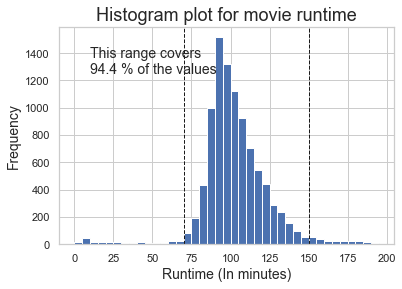

In [24]:
# We should first have a look at the Most Frequent Runtime of movies
bins = np.arange(0,200,5)
# get the values that falls in the range that covers most of the value.
in_range = data.query("150 > runtime > 70 ")
auc = round((in_range.shape[0]/data.shape[0])* 100,1) 


plt.hist(data['runtime'],bins = bins);
plt.xlabel('Runtime (In minutes)', fontsize=14);
plt.ylabel('Frequency', fontsize=14);
plt.title('Histogram plot for movie runtime', fontsize=18);
plt.axvline(70, color='k', linestyle='dashed', linewidth=1);
plt.axvline(150, color='k', linestyle='dashed', linewidth=1);
plt.text(10, 1250, f'This range covers \n{auc} % of the values', fontsize=14);

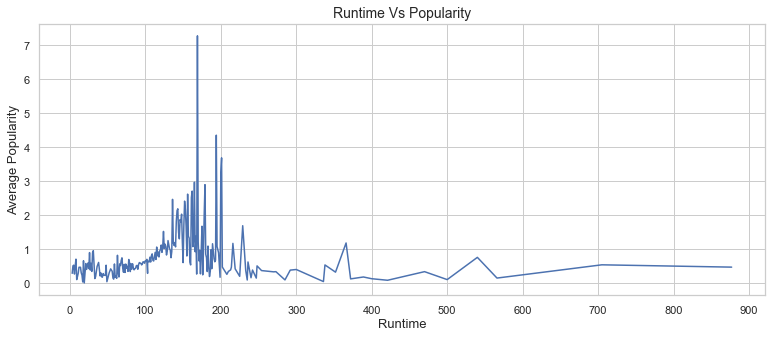

In [25]:
# To find the most liked runtime, First we will group data by 'runtime' then make a plot using their popularity 
# and find which runtime movies are most popular

#make the group of the data according to their runtime and find the mean popularity related to this runtime and plot.
data.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

#### Here we can find that movies with runtime around 150 minutes are more popular than other runtime movies.

### Research Question 5  (Which movies have largest and lowest budgets?)

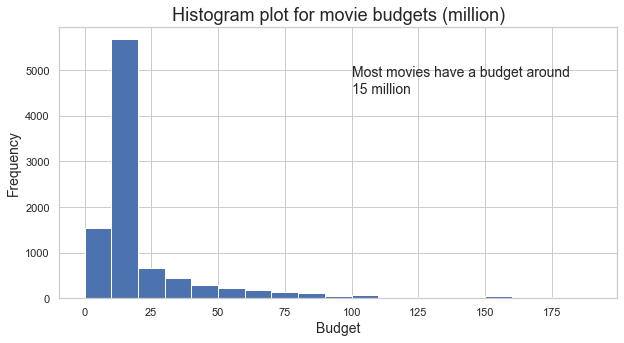

In [26]:
# First we should look at the distribution of budget column
plt.hist(data['budget'].apply(lambda x: x/1000000),bins=np.arange(0,200,10));
plt.title('Histogram plot for movie budgets (million)', fontsize=18)
plt.xlabel('Budget', fontsize=14);
plt.ylabel('Frequency', fontsize=14);
plt.text(100, 4500, f'Most movies have a budget around \n15 million', fontsize=14);

#### Now, Find movies have largest and lowest budgets.

In [27]:
#use the function 'idmin' to find the index of the movie with the lowest budget
min_index = data['budget'].idxmin()
#use the function 'idmax' to find the index of the movie with the highest budget
high_index = data['budget'].idxmax()

# Retraive these indexes information
highest_budget = pd.DataFrame(data.loc[high_index,:])
lowest_budget = pd.DataFrame(data.loc[min_index,:])

print("Movie Which Has Highest "+ 'budget' + " : ",data['original_title'][high_index])
print("Movie Which Has Lowest "+ 'budget' + "  : ",data['original_title'][min_index])
pd.concat([highest_budget,lowest_budget], axis = 1)



Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Eraserhead


,2244,1354
id,46528,985
popularity,0.25054,0.331417
budget,4.25e+08,10000
revenue,1.10876e+07,7e+06
original_title,The Warrior's Way,Eraserhead
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Jack Nance|Charlotte Stewart|Allen Joseph|Jean...
director,Sngmoo Lee,David Lynch
runtime,100,89
genres,Adventure|Fantasy|Action|Western|Thriller,Science Fiction|Fantasy|Horror|Drama
production_companies,Boram Entertainment Inc.,American Film Institute (AFI)|Libra Films


### Research Question 6  (What Are The 10 Best Movie Production Companies?(by number of produced movies))

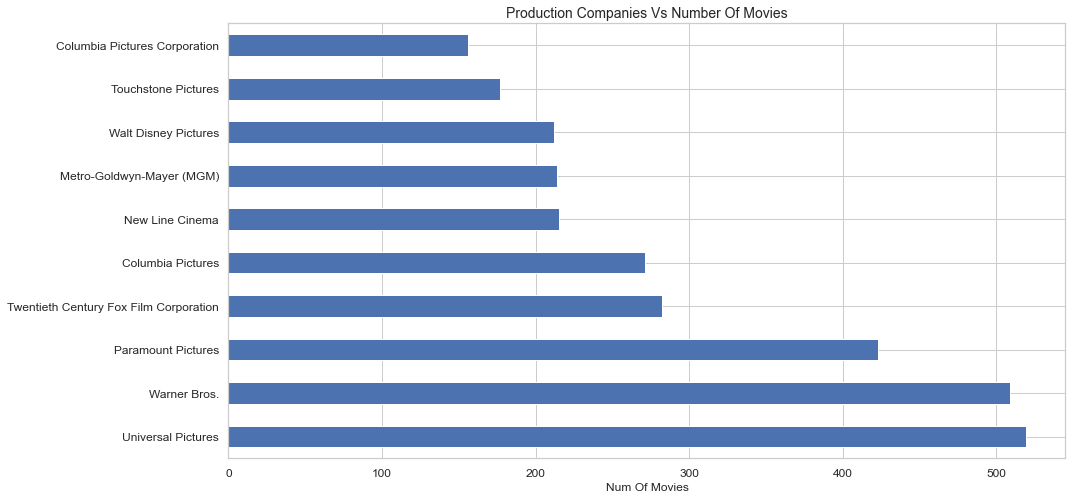

In [28]:
# First we split production_companies column using seperate function that we built before
companies = separate(data['production_companies'])
# second using pd.melt 
companies = pd.melt(companies,col_level = 0,value_vars = [0,1,2,3,4])
# then drop 'variable' column because it's useless
companies.drop(['variable'], axis=1, inplace=True)
# Now we should drop any rows with null values
genres.dropna(inplace = True)
# then we calculate value_counts 
production_companies = companies.value.value_counts(ascending=False)
# finally we plot the top 10 companies
production_companies.iloc[:10].plot(kind='barh',figsize=(15,8),fontsize=12)
plt.title("Production Companies Vs Number Of Movies",fontsize=14)
plt.xlabel('Num Of Movies',fontsize=12)
sns.set_style("whitegrid")

### Reasearch Question 7: What Are The 10 Top Movie Production Companies?(by net profit)?

In [29]:
# we need to calculate the net profit for each movie
data['net_profit'] = data['revenue'] - data['budget']

In [30]:
# Now we use seperate function to split production_companies column
prod_companies = separate(data['production_companies'])
# Now we add 'id' column to associate each movie to its production company
prod_companies['id'] = data['id']
# Now we apply pd.melt function
prod_companies = pd.melt(prod_companies,col_level = 0,id_vars = 'id',value_vars = [0,1,2,3,4])
# then drop 'variable' column because it's useless
prod_companies.drop(['variable'], axis=1, inplace=True)
# Now rename columns to be more meaningful
prod_companies.rename(columns = {'value':'production_company'},inplace = True)
#drop rows with null values
prod_companies.dropna(inplace=True)


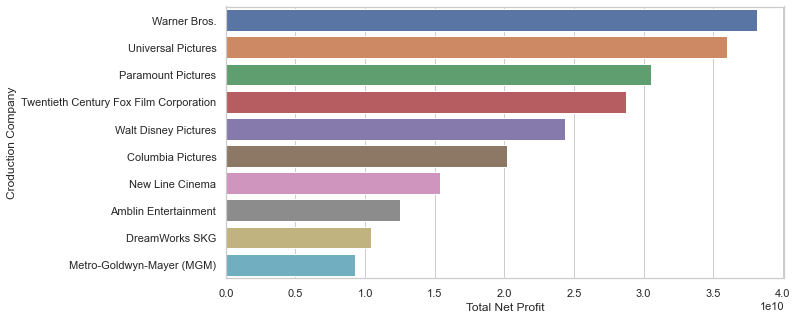

In [31]:
# we will create a copy from our data without 'production_companies' columns, so that there would be no confusion bewteen it and the new 'genres' 
data_without_genres = data.drop(['genres'], axis=1)
# For our analysis we need to add 'net_profit year' column to our geners dataframe so we merge this dataframe with the whole dataset
companies_movies = pd.merge(data , prod_companies , how = 'inner' , on = 'id')
grouped_company = companies_movies.groupby('production_company')['net_profit'].sum().reset_index(name = 'Net_Profit')
# Find the top 10 companies
top_10_compaines = grouped_company.nlargest(10,'Net_Profit')
# Plot what we have now
sns.set(style="whitegrid");
f, ax = plt.subplots();
ax = sns.barplot(x='Net_Profit', y='production_company', data=top_10_compaines);
ax.set( ylabel="Croduction Company", xlabel="Total Net Profit");



### Reasearch Question 8: Which decade has the most number of releases?

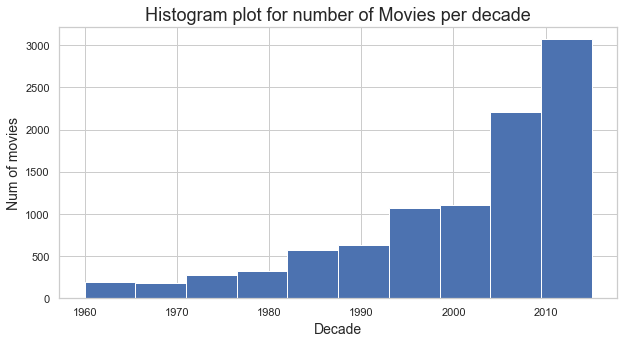

In [33]:
# Plot a histogram for the 'release_year' column.
plt.hist(data['release_year']);
plt.title('Histogram plot for number of Movies per decade', fontsize=18)
plt.xlabel('Decade', fontsize=14);
plt.ylabel('Num of movies', fontsize=14);


<a id='conclusions'></a>
## Conclusions

- "Pink Floyd: pulse" is the top rated movie in this dataset

- "Transmorphers" is the lowest rated movie in this dataset

-  "Budget" and "Vote_count" features are strongly correlated with revenue value

- "runtime" and "Vote average" features don't have great impact on movie's revenue

- Drame is the most popular genre, then comes Comedy

- Movies with runtime aroung 150 minutes are preferred over the others

- "The Warrior's Way" movie has the largest budget

- "Eraserhead" movie has the smallest budget

- universal pictures company has produced movies more than any other company

- warner bros company earn more net profit more than any other company 

- The 2010s has the highest number of movie releases among other decades


## Limitations

- THis investigation is not 100% perfect as we had to drop some rows with null values, And also we needed to fill some null values with some approximation.

- This investigation was done considering the movies which had an amount of budget of more than 10 thousand to overcome the incorrect data problem